In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset=pd.read_csv(r"C:\Users\Administrator\datasets\loan_prediction.csv")

In [2]:
dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
dataset.fillna(method="bfill",inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_920\4270340768.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method="bfill",inplace=True)


In [4]:
dataset["Dependents"].replace("3+","3",inplace=True)
dataset["Dependents"]=dataset["Dependents"].astype("int64")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_920\2230891722.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Dependents"].replace("3+","3",inplace=True)


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset["Loan_ID"]=le.fit_transform(dataset["Loan_ID"])
dataset["Gender"]=le.fit_transform(dataset["Gender"])
dataset["Married"]=le.fit_transform(dataset["Married"])
dataset["Education"]=le.fit_transform(dataset["Education"])
dataset["Self_Employed"]=le.fit_transform(dataset["Self_Employed"])
dataset["Property_Area"]=le.fit_transform(dataset["Property_Area"])
dataset["Loan_Status"]=le.fit_transform(dataset["Loan_Status"])

In [6]:
for i in dataset.columns:
    q1=dataset[i].quantile(0.25)
    q3=dataset[i].quantile(0.75)
    IQR=q3-q1
    min_range=q1-(1.5*IQR)
    max_range=q3+(1.5*IQR)
    new_dataset=dataset[dataset[i]<=max_range]

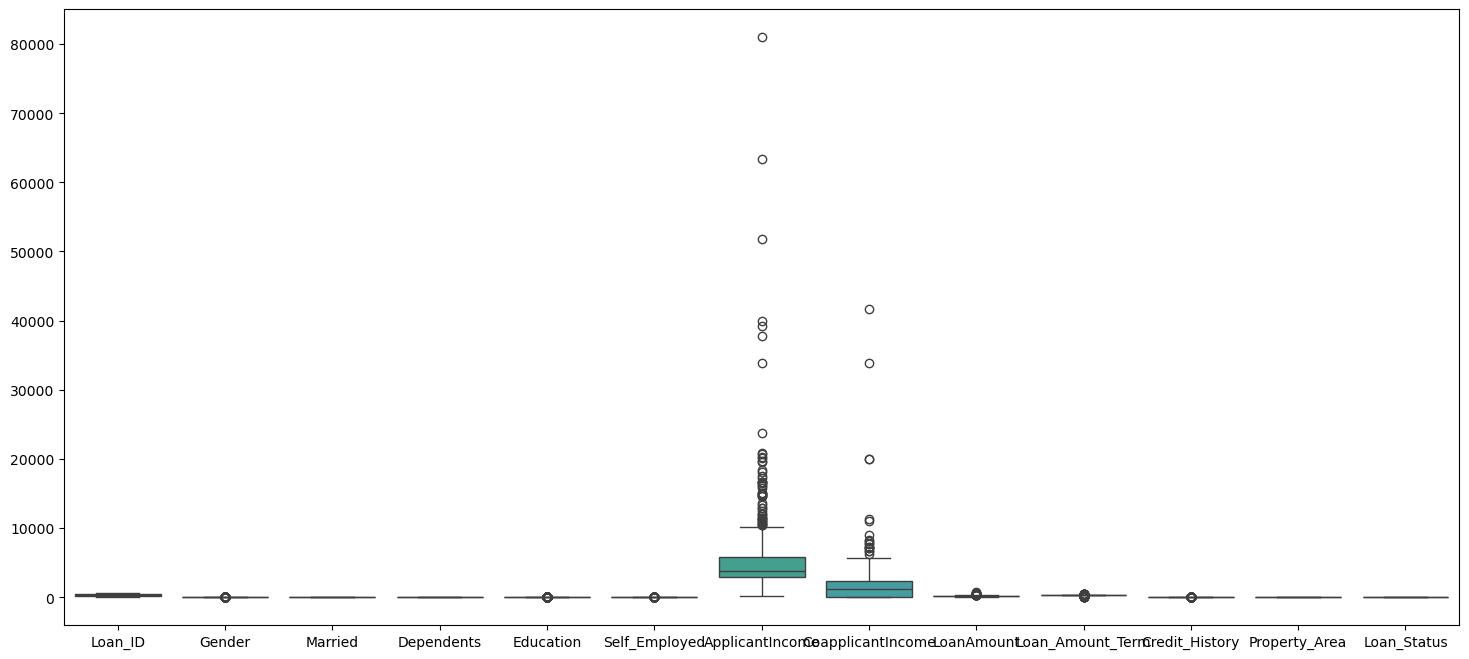

In [7]:
plt.figure(figsize=(18,8))
sns.boxplot(data=new_dataset) 
plt.show()

In [8]:
new_dataset.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.00000,614.000000,614.000000
mean,306.500000,0.815961,0.649837,0.760586,0.218241,0.140065,5403.459283,1621.245798,146.416938,342.410423,0.84202,1.037459,0.687296
std,177.390811,0.387832,0.477410,1.012005,0.413389,0.347338,6109.041673,2926.248369,84.917398,64.428629,0.36502,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.00000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.00000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.00000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,166.750000,360.000000,1.00000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.00000,2.000000,1.000000


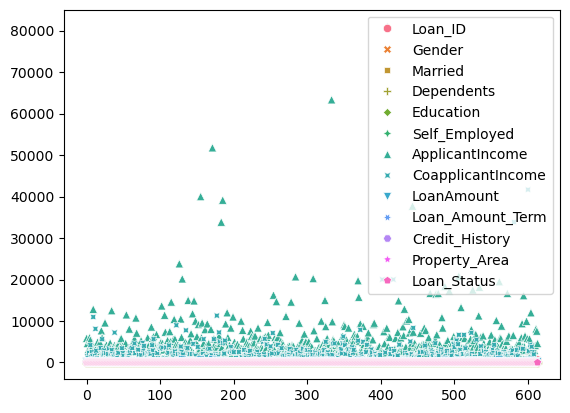

In [9]:
sns.scatterplot(data=new_dataset)
plt.legend(loc=1)
plt.show()

In [10]:
new_dataset.drop(columns=["LoanAmount"],inplace=True)

In [11]:
new_dataset.drop_duplicates(inplace=True)

In [12]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
for i in new_dataset.columns:
    
    ms.fit(new_dataset[[i]])
    new_dataset[i]=ms.transform(new_dataset[[i]])

In [13]:
new_dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.74359,1.0,1.0,1.0
1,0.001631,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.74359,1.0,0.0,0.0
2,0.003263,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.74359,1.0,1.0,1.0
3,0.004894,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.74359,1.0,1.0,1.0
4,0.006525,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.74359,1.0,1.0,1.0
5,0.008157,1.0,1.0,0.666667,0.0,1.0,0.065145,0.100703,0.74359,1.0,1.0,1.0
6,0.009788,1.0,1.0,0.000000,1.0,0.0,0.027001,0.036384,0.74359,1.0,1.0,1.0
7,0.011419,1.0,1.0,1.000000,0.0,0.0,0.035696,0.060096,0.74359,0.0,0.5,0.0
8,0.013051,1.0,1.0,0.666667,0.0,0.0,0.047693,0.036624,0.74359,1.0,1.0,1.0
9,0.014682,1.0,1.0,0.333333,0.0,0.0,0.156970,0.263230,0.74359,1.0,0.5,0.0


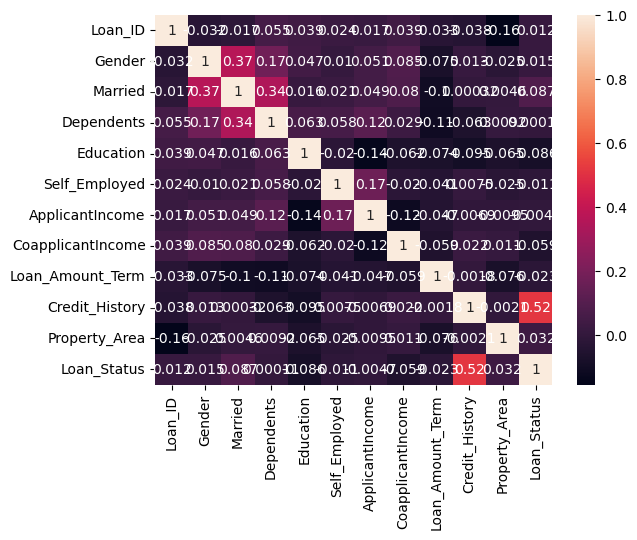

In [14]:
sns.heatmap(data=new_dataset.corr(),annot=True)
plt.show()

In [15]:
x=new_dataset.iloc[:,:-1]
y=new_dataset["Loan_Status"]

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [17]:
from sklearn.tree import DecisionTreeClassifier  
dt=DecisionTreeClassifier(max_depth=2)

In [18]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [19]:
dt.score(x_train,y_train)*100

81.05906313645622

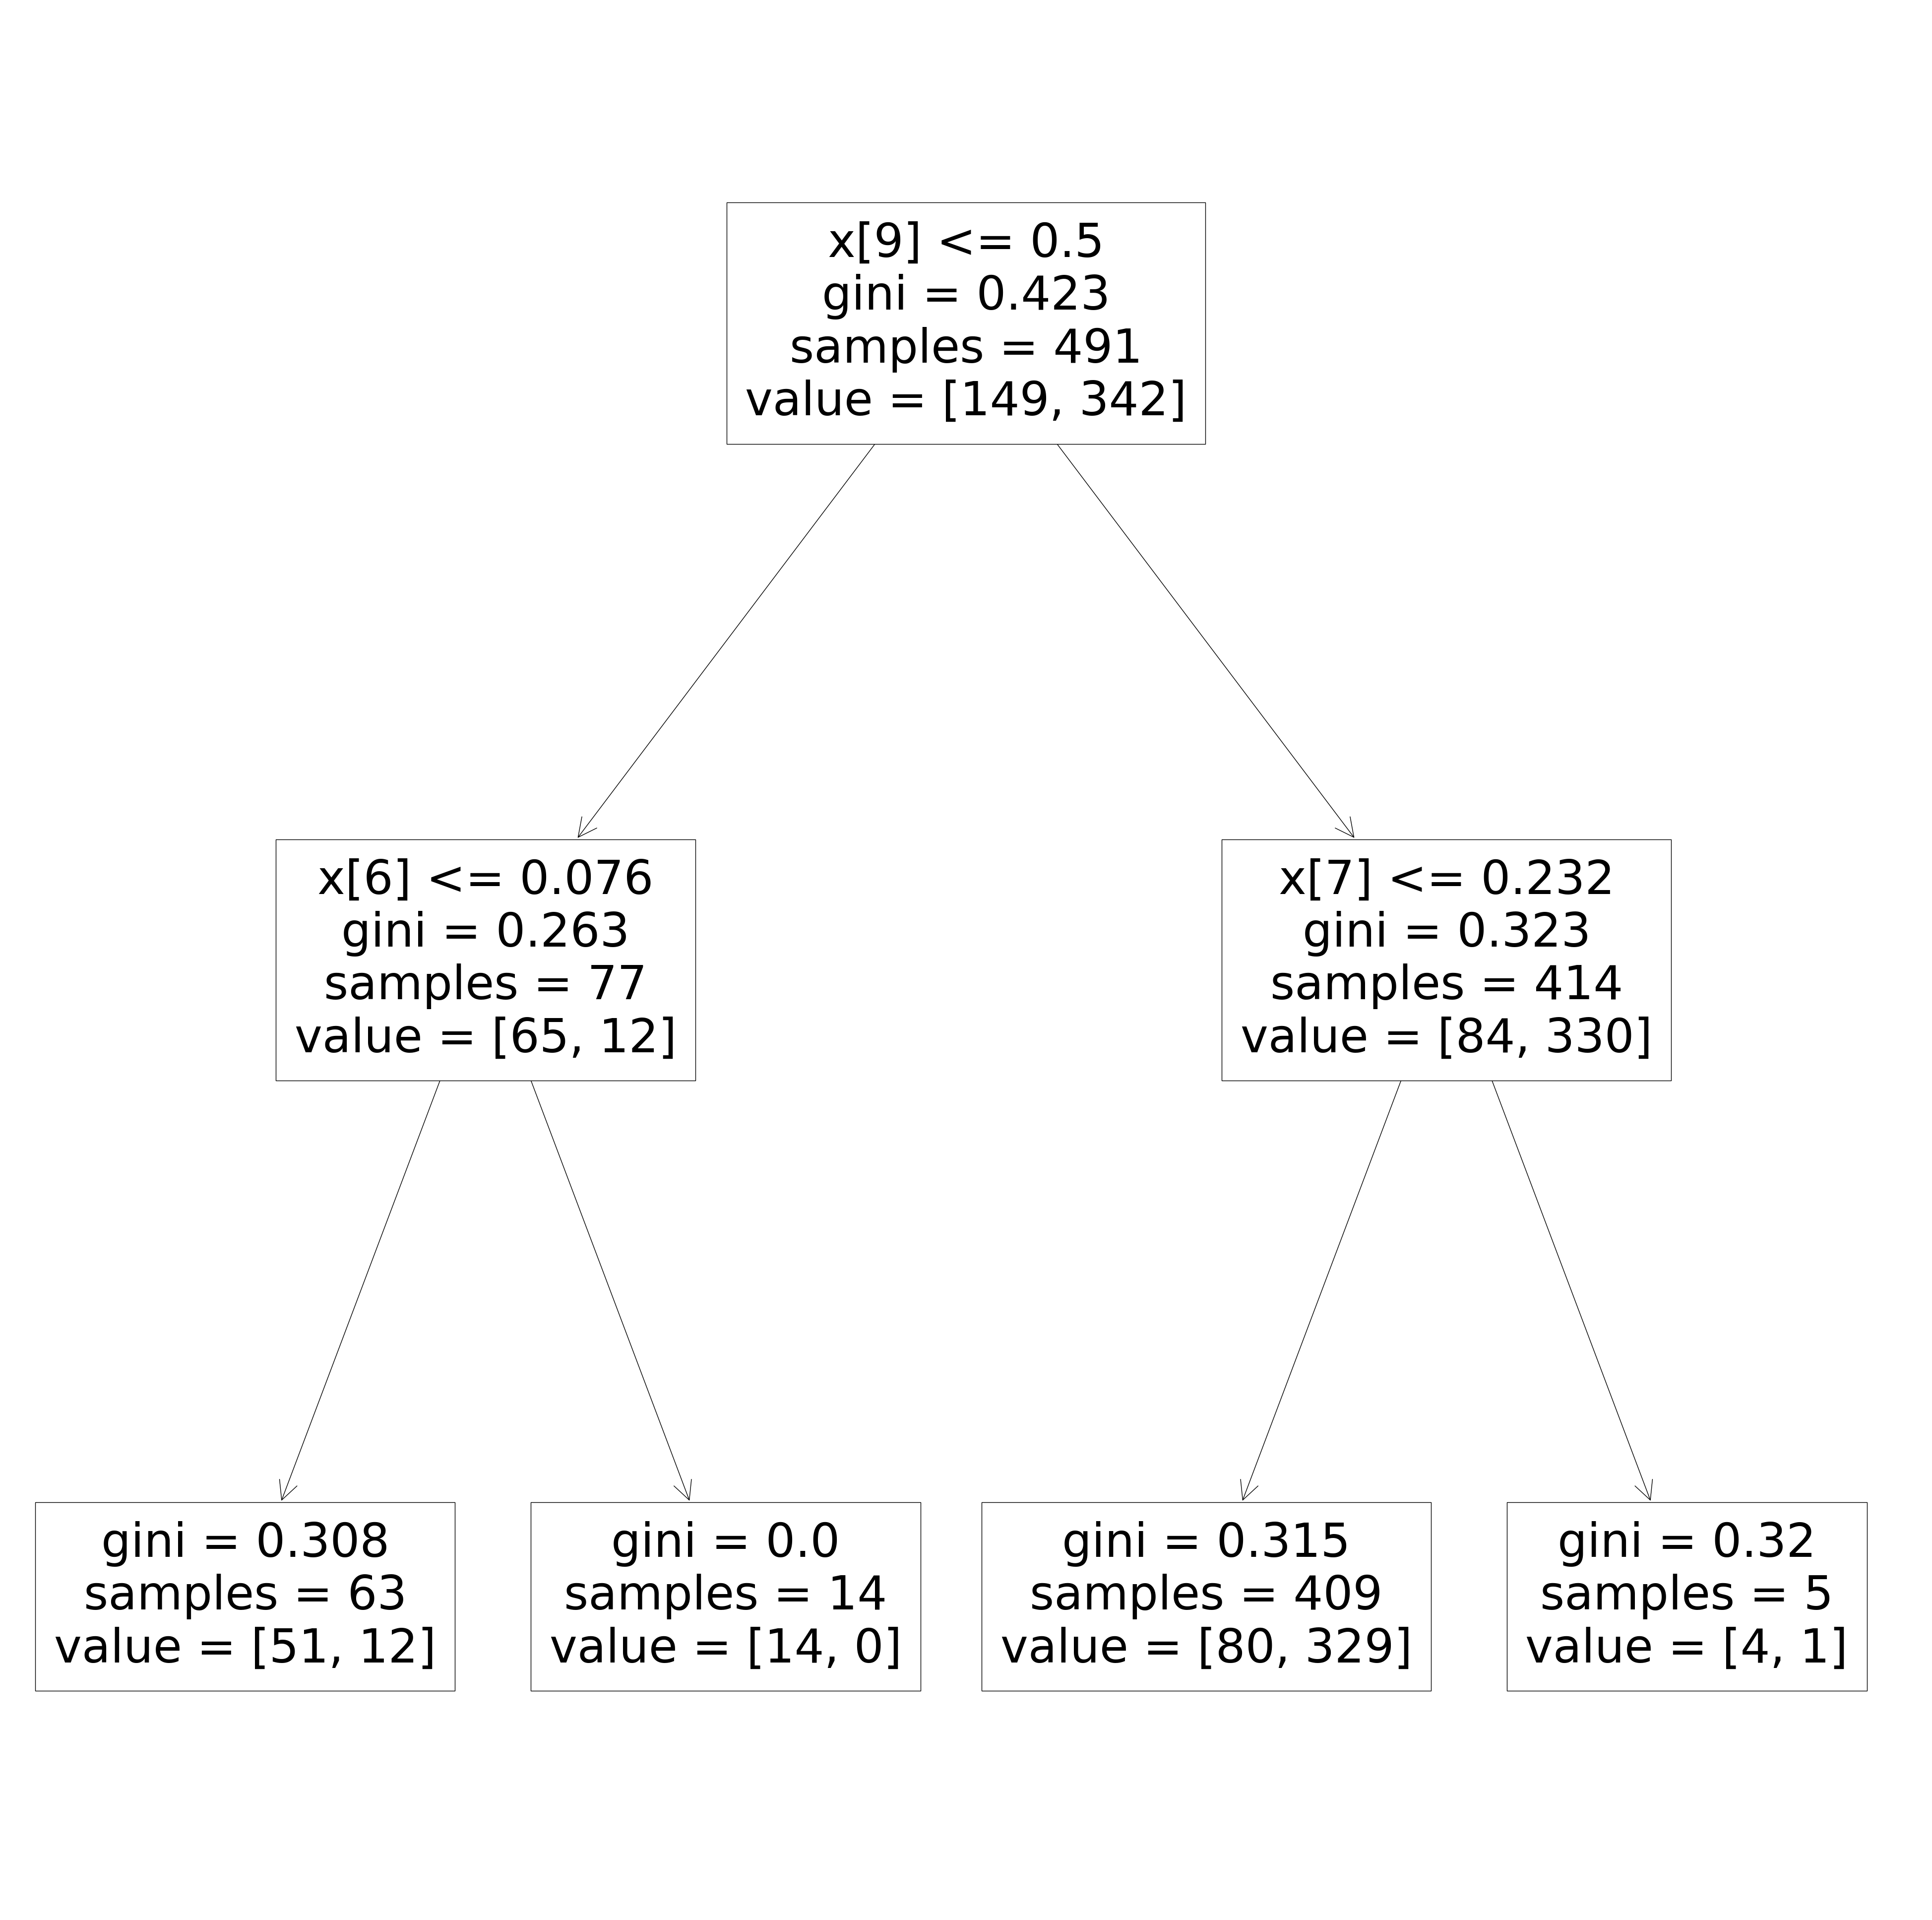

In [20]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig("demo.jpg")
plt.show()


In [21]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
cf=confusion_matrix(y_test,dt.predict(x_test))

In [22]:
cf

array([[19, 24],
       [ 1, 79]], dtype=int64)

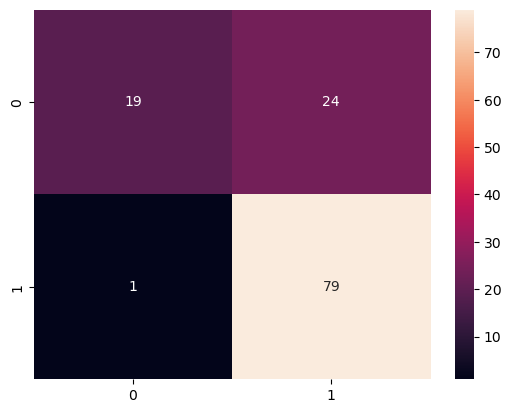

In [23]:
sns.heatmap(cf,annot=True)
plt.show()

In [24]:
precision_score(y_test,dt.predict(x_test))*100

76.69902912621359

In [25]:
recall_score(y_test,dt.predict(x_test))*100

98.75

In [26]:
f1_score(y_test,dt.predict(x_test))*100

86.33879781420765